In [2]:
pip install duckdb

   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
    --------------------------------------- 0.3/11.4 MB ? eta -:--:--
    --------------------------------------- 0.3/11.4 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.4 MB 1.2 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/11.4 MB 1.9 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.4 MB 2.1 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.4 MB 2.1 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.4 MB 2.0 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.4 MB 1.9 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.4 MB 1.9 MB/s eta 0:00:05
   ----------- ---------------------------- 3.1/11.4 MB 1.9 MB/s eta 0:00:05
   ----------- -------------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.8 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/11.0 MB 1.8 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.0 MB 1.8 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.0 MB 1.9 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.0 MB 1.7 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.0 MB 1.5 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.0 MB 1.5 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.0 MB 1.5 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.0 MB 1.5 MB/s eta 0:00:06
   ------------ ------------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas
import duckdb

In [10]:
pixar_films = pandas.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-03-11/pixar_films.csv')

In [10]:
cn = duckdb.connect("pixar_films_data.db")

In [13]:
cn.execute("""
            INSTALL https;
            LOAD https;
            INSTALL excel;
            LOAD excel;
            """)

In [15]:
sql = """
        create or replace table pixar_data
        as 
        select number, film, release_date, run_time, film_rating
        from pixar_films
"""
cn.sql(sql)

In [16]:
cn.sql("select film, release_date, run_time, film_rating, count(*) from pixar_data group by all order by 1 desc")

┌───────────────────┬──────────────┬──────────┬─────────────┬──────────────┐
│       film        │ release_date │ run_time │ film_rating │ count_star() │
│      varchar      │   varchar    │  double  │   varchar   │    int64     │
├───────────────────┼──────────────┼──────────┼─────────────┼──────────────┤
│ WALL-E            │ 2008-06-27   │     98.0 │ G           │            1 │
│ Up                │ 2009-05-29   │     96.0 │ PG          │            1 │
│ Turning Red       │ 2022-03-11   │     NULL │ NULL        │            1 │
│ Toy Story 4       │ 2019-06-21   │    100.0 │ G           │            1 │
│ Toy Story 3       │ 2010-06-18   │    103.0 │ G           │            1 │
│ Toy Story 2       │ 1999-11-24   │     92.0 │ G           │            1 │
│ Toy Story         │ 1995-11-22   │     81.0 │ G           │            1 │
│ The Incredibles   │ 2004-11-05   │    115.0 │ PG          │            1 │
│ The Good Dinosaur │ 2015-11-25   │     93.0 │ PG          │            1 │

In [65]:
public_response = pandas.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-03-11/public_response.csv')
def classify_value(value):
    match value:
        case "A+":
            return 96.0
        case "A":
            return 90.0
        case "A-":
            return 83.0
        case _: # default case
            return 0
public_response['cinema_score'] = public_response['cinema_score'].apply(classify_value)
# public_response

# clean data

# Fill NaN values in 'critics_choice' with 0 for plotting (you can choose another value if preferred)
public_response['critics_choice'] = public_response['critics_choice'].fillna(0)

# Convert the cinema score letter ratings to average numeric ratings

# public_response['cinema_score'] = 

# Drop the row where the film is 'Luca'
# It has NaN value for each category
public_response = public_response[public_response['film'] != 'Luca']

# Sort the films alphabetically or by any other criteria (optional)
sorted_films = public_response.sort_values('film')
sorted_films

,film,rotten_tomatoes,metacritic,cinema_score,critics_choice
1,A Bug's Life,92.0,77.0,90.0,0.0
12,Brave,78.0,69.0,90.0,81.0
6,Cars,74.0,73.0,90.0,89.0
11,Cars 2,40.0,57.0,83.0,67.0
17,Cars 3,69.0,59.0,90.0,66.0
18,Coco,97.0,81.0,96.0,89.0
16,Finding Dory,94.0,77.0,90.0,89.0
4,Finding Nemo,99.0,90.0,96.0,97.0
19,Incredibles 2,93.0,80.0,96.0,86.0
14,Inside Out,98.0,94.0,90.0,93.0


In [66]:
# Which films have the highest score in each rating system?
# rotten_tomatoes
sql = """
        create or replace table response_data
        as 
        select film, rotten_tomatoes, metacritic, cinema_score, critics_choice
        from public_response
"""
cn.sql(sql)
cn.sql("select pixar.film, max(response.rotten_tomatoes) as score from pixar_data pixar join response_data response on pixar.film = response.film group by pixar.film order by max(response.rotten_tomatoes) desc limit 2")

┌─────────────┬────────┐
│    film     │ score  │
│   varchar   │ double │
├─────────────┼────────┤
│ Toy Story   │  100.0 │
│ Toy Story 2 │  100.0 │
└─────────────┴────────┘

In [67]:
# metacritic
cn.sql("select pixar.film, max(response.metacritic) as score from pixar_data pixar join response_data response on pixar.film = response.film group by pixar.film order by max(response.metacritic) desc limit 2")

┌─────────────┬────────┐
│    film     │ score  │
│   varchar   │ double │
├─────────────┼────────┤
│ Ratatouille │   96.0 │
│ Toy Story   │   95.0 │
└─────────────┴────────┘

In [73]:
# cinema score
cn.sql("select pixar.film, max(response.cinema_score) as score from pixar_data pixar join response_data response on pixar.film = response.film group by pixar.film order by max(response.cinema_score) desc limit 2")

┌─────────────────┬────────┐
│      film       │ score  │
│     varchar     │ double │
├─────────────────┼────────┤
│ Toy Story 2     │   96.0 │
│ The Incredibles │   96.0 │
└─────────────────┴────────┘

In [72]:
# critics choice
cn.sql("select pixar.film, max(response.critics_choice) as score from pixar_data pixar join response_data response on pixar.film = response.film group by pixar.film order by max(response.critics_choice) desc limit 2")

┌─────────────┬────────┐
│    film     │ score  │
│   varchar   │ double │
├─────────────┼────────┤
│ Toy Story 2 │  100.0 │
│ Toy Story 3 │   97.0 │
└─────────────┴────────┘

In [71]:
box_office = pandas.read_csv('https://raw.githubusercontent.com/erictleung/pixarfilms/master/data-raw/box_office.csv')
box_office

,film,budget,box_office_us_canada,box_office_other,box_office_worldwide
0,Toy Story,30000000.0,223225679,171210907,394436586
1,A Bug's Life,120000000.0,162798565,200460294,363258859
2,Toy Story 2,90000000.0,245852179,265506097,511358276
3,"Monsters, Inc.",115000000.0,255873250,272900000,528773250
4,Finding Nemo,94000000.0,339714978,531300000,871014978
5,The Incredibles,92000000.0,261441092,370001000,631442092
6,Cars,120000000.0,244082982,217900167,461983149
7,Ratatouille,150000000.0,206445654,417280431,623726085
8,WALL-E,180000000.0,223808164,297503696,521311860
9,Up,175000000.0,293004164,442094918,735099082


In [43]:
pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.3 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.1 MB 1.2 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 1.6 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 2.0 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 2.0 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 1.9 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 1.8 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 1.8 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 1.8 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 1.3 MB/s eta 0:00:04
   ------------------- ----------

In [16]:
import matplotlib.pyplot as plt
import numpy as np

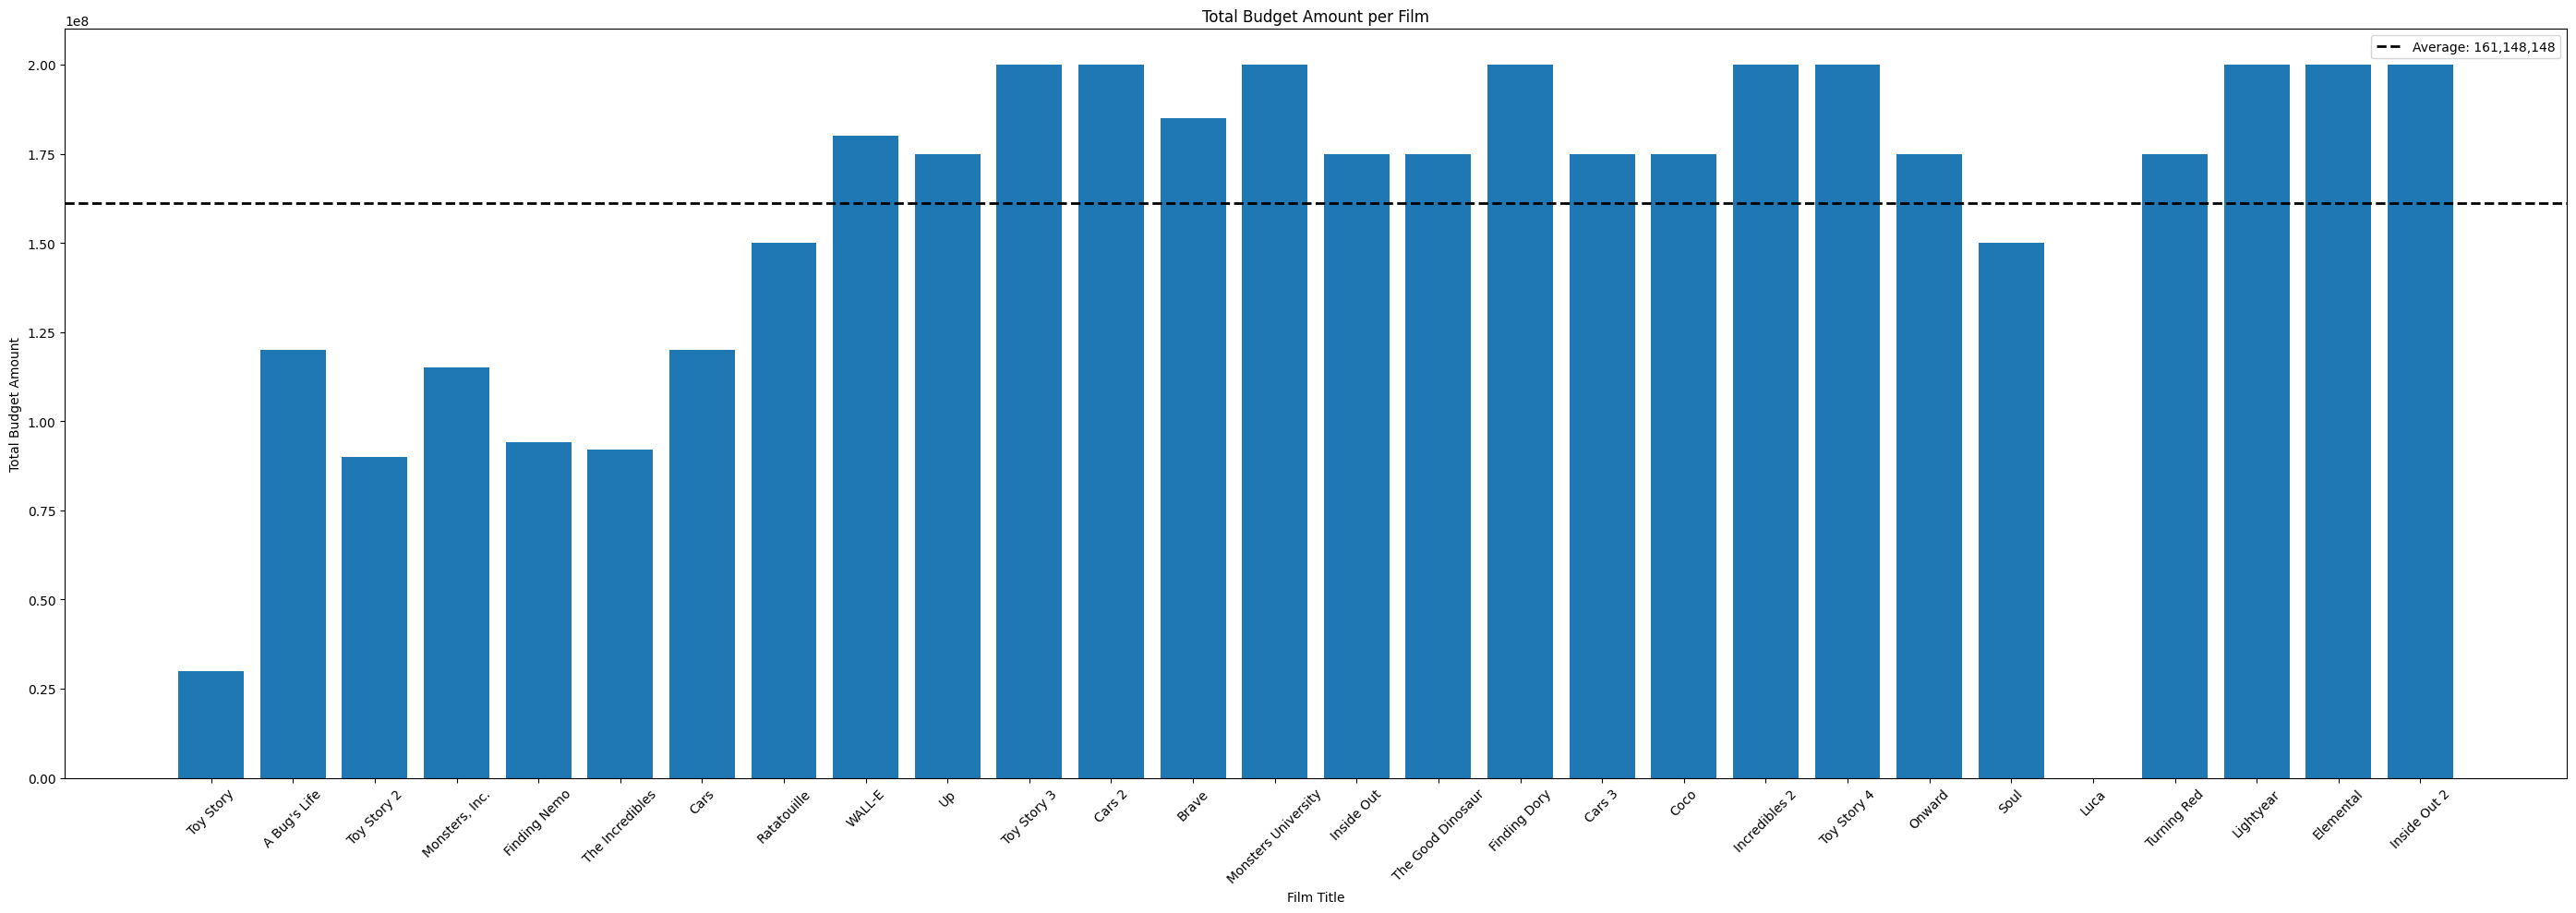

In [102]:
sql = """
        create or replace table box_office_data
        as 
        select film, budget, box_office_us_canada, box_office_other, box_office_worldwide
        from box_office
"""
cn.sql(sql)

df = cn.sql("select * from box_office_data").df()

plt.figure(figsize=(28,10))
plt.bar(df['film'], df['budget'])
avg_total_budget = df['budget'].mean()

# Add a dashed black line for the average 
plt.axhline(avg_total_budget, color='black', linestyle='dashed', linewidth=2, label=f'Average: {avg_total_budget:,.0f}')

plt.xlabel('Film Title')
plt.ylabel('Total Budget Amount')
plt.title('Total Budget Amount per Film')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

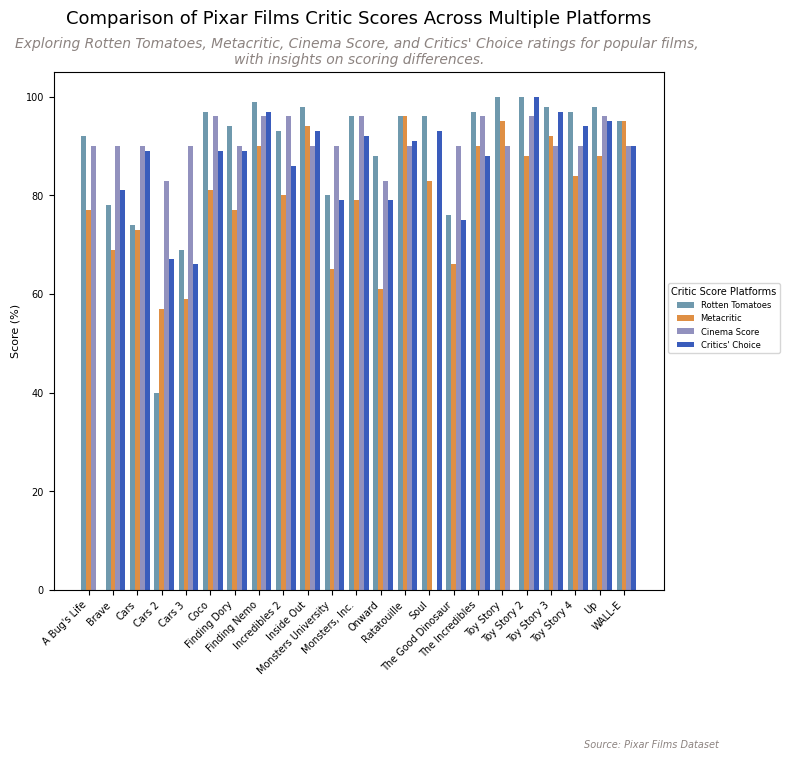

In [79]:
# Create spaced-out x positions (e.g., 0, 3, 6, 9...)
x = np.arange(0, len(sorted_films) * 5, 5)

# Set up the figure and axes
fig, ax = plt.subplots(figsize = (8, 8))

# Define the bar width
bar_width = 1

my_col = ['#3a5cbc', '#9291be', '#c15451', '#6F99AD', '#DF8F44', '#80796B']

# Plot bars for each score type
ax.bar(x - bar_width, sorted_films['rotten_tomatoes'], width=bar_width, label='Rotten Tomatoes', color='#6F99AD')
ax.bar(x, sorted_films['metacritic'], width=bar_width, label='Metacritic', color='#DF8F44')
ax.bar(x + bar_width, sorted_films['cinema_score'], width=bar_width, label='Cinema Score', color='#9291be')
ax.bar(x + (2*bar_width), sorted_films['critics_choice'], width=bar_width, label="Critics' Choice", color='#3a5cbc')

# Labeling
ax.set_xticks(x)
ax.set_xticklabels(sorted_films['film'], 
                    fontsize = 7,
                    rotation = 45, 
                    ha = 'right')

# Adjust the legend
ax.legend(fontsize=6, 
          title_fontsize=7,
          loc='upper left', 
          bbox_to_anchor=(1, 0.6), 
          title="Critic Score Platforms")

# Add labels and title
plt.xlabel("")
plt.ylabel('Score (%)', fontsize=8)

# Change the size of the y-axis tick labels
ax.tick_params(axis='y', labelsize=7)

plt.title(
    "Comparison of Pixar Films Critic Scores Across Multiple Platforms", 
    fontsize = 13,
    pad = 35,
    x = 0.5
    )

# Add the subtitle for clarification
plt.text(x = 0.5, y = 1.04, 
        s = "Exploring Rotten Tomatoes, Metacritic, Cinema Score, and Critics' Choice ratings for popular films, \nwith insights on scoring differences.", 
        ha = 'center', 
        va = 'center',
        fontsize = 10, 
        style = 'italic', 
        color = "#8C8380",
        transform = plt.gca().transAxes)

# Add a caption to the plot
plt.text(
    x = 0.98, y = -0.3,  # Adjust x, y to position the caption below 
    s = "Source: Pixar Films Dataset", 
    ha = 'center', 
    va = 'center', 
    fontsize = 7, 
    style = 'italic', 
    color = "#8C8380", 
    transform = plt.gca().transAxes
)

# Show plot
plt.tight_layout()
plt.show()

# plt.savefig("plot.png", dpi = 600, bbox_inches='tight')  # Save with high resolution

In [13]:
# How does the box_office_us_canada value compare to the various ratings?
# Is the trend different for box_office_worldwide?
cn.sql("select film, budget, box_office_us_canada, box_office_other, box_office_worldwide from box_office_data where film = 'Toy Story 2'")

┌─────────────┬────────────┬──────────────────────┬──────────────────┬──────────────────────┐
│    film     │   budget   │ box_office_us_canada │ box_office_other │ box_office_worldwide │
│   varchar   │   double   │        int64         │      int64       │        int64         │
├─────────────┼────────────┼──────────────────────┼──────────────────┼──────────────────────┤
│ Toy Story 2 │ 90000000.0 │            245852179 │        265506097 │            511358276 │
└─────────────┴────────────┴──────────────────────┴──────────────────┴──────────────────────┘

In [14]:
cn.sql("select film, budget, box_office_us_canada, box_office_other, box_office_worldwide from box_office_data where film = 'Ratatouille'")

┌─────────────┬─────────────┬──────────────────────┬──────────────────┬──────────────────────┐
│    film     │   budget    │ box_office_us_canada │ box_office_other │ box_office_worldwide │
│   varchar   │   double    │        int64         │      int64       │        int64         │
├─────────────┼─────────────┼──────────────────────┼──────────────────┼──────────────────────┤
│ Ratatouille │ 150000000.0 │            206445654 │        417280431 │            623726085 │
└─────────────┴─────────────┴──────────────────────┴──────────────────┴──────────────────────┘

In [21]:
cn.sql("select box_office_us_canada, film from box_office_data group by film, box_office_us_canada order by 1 desc")

┌──────────────────────┬─────────────────────┐
│ box_office_us_canada │        film         │
│        int64         │       varchar       │
├──────────────────────┼─────────────────────┤
│            652980194 │ Inside Out 2        │
│            608581744 │ Incredibles 2       │
│            486295561 │ Finding Dory        │
│            434038008 │ Toy Story 4         │
│            415004880 │ Toy Story 3         │
│            356461711 │ Inside Out          │
│            339714978 │ Finding Nemo        │
│            293004164 │ Up                  │
│            268492764 │ Monsters University │
│            261441092 │ The Incredibles     │
│                ·     │   ·                 │
│                ·     │   ·                 │
│                ·     │   ·                 │
│            191452396 │ Cars 2              │
│            162798565 │ A Bug's Life        │
│            154426697 │ Elemental           │
│            152901115 │ Cars 3              │
│            

In [22]:
cn.sql("select box_office_other, film from box_office_data group by film, box_office_other order by 1 desc")

┌──────────────────┬─────────────────────┐
│ box_office_other │        film         │
│      int64       │       varchar       │
├──────────────────┼─────────────────────┤
│       1045050771 │ Inside Out 2        │
│        651964823 │ Toy Story 3         │
│        639356585 │ Toy Story 4         │
│        634223615 │ Incredibles 2       │
│        604181157 │ Coco                │
│        542275328 │ Finding Dory        │
│        531300000 │ Finding Nemo        │
│        501149463 │ Inside Out          │
│        475066843 │ Monsters University │
│        442094918 │ Up                  │
│            ·     │ ·                   │
│            ·     │ ·                   │
│            ·     │ ·                   │
│        231029541 │ Cars 3              │
│        217900167 │ Cars                │
│        209120551 │ The Good Dinosaur   │
│        200460294 │ A Bug's Life        │
│        171210907 │ Toy Story           │
│        120957731 │ Soul                │
│        10

In [23]:
cn.sql("select box_office_worldwide, film from box_office_data group by film, box_office_worldwide order by 1 desc")

┌──────────────────────┬─────────────────────┐
│ box_office_worldwide │        film         │
│        int64         │       varchar       │
├──────────────────────┼─────────────────────┤
│           1698030965 │ Inside Out 2        │
│           1242805359 │ Incredibles 2       │
│           1073394593 │ Toy Story 4         │
│           1066969703 │ Toy Story 3         │
│           1028570889 │ Finding Dory        │
│            871014978 │ Finding Nemo        │
│            857611174 │ Inside Out          │
│            814641172 │ Coco                │
│            743559607 │ Monsters University │
│            735099082 │ Up                  │
│                ·     │ ·                   │
│                ·     │ ·                   │
│                ·     │ ·                   │
│            461983149 │ Cars                │
│            394436586 │ Toy Story           │
│            383930656 │ Cars 3              │
│            363258859 │ A Bug's Life        │
│            